<a href="https://colab.research.google.com/github/Guillermo-rv/ML/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method(df_data, max_number_clusters):
  list_inertia = []
  for i in range(1, max_number_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init="auto")
    kmeans.fit(df_data)
    list_inertia.append(kmeans.inertia_)

  plt.plot(range(1, max_number_clusters+1) ,  #horizontal axis
           list_inertia) # vertical axis
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show() # Important!!

from sklearn.metrics import silhouette_score
def silhouette_method(df_data, max_number_clusters):
  list_silhouette = []
  for i in range(2, max_number_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init="auto")
    kmeans.fit(df_data)
    list_silhouette.append(silhouette_score(df_data, kmeans.labels_))

  plt.plot(range(2, max_number_clusters+1) ,  #horizontal axis
           list_silhouette) # vertical axis
  plt.xlabel('Number of clusters')
  plt.ylabel('Silhouette score')
  plt.show() # Important!!

## Exercise 2

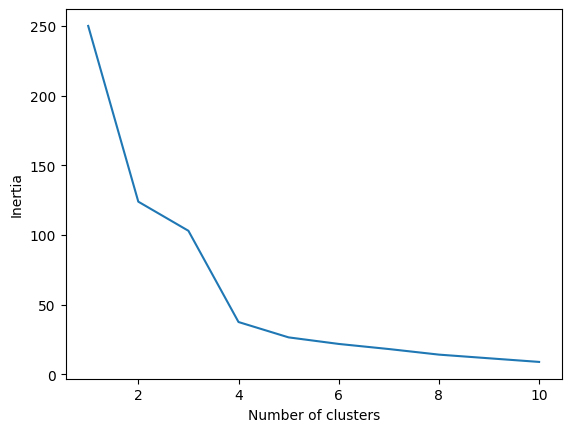

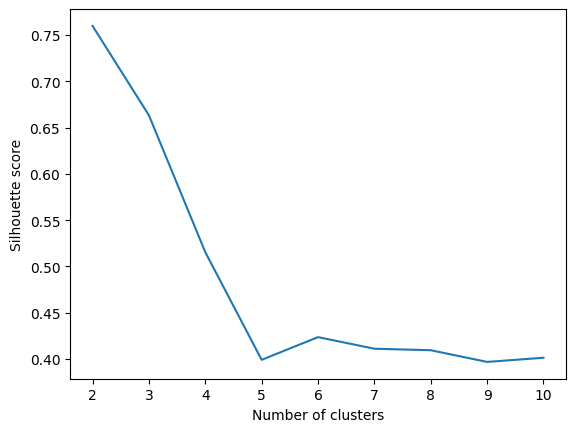

In [ ]:
import pandas as pd
# Importing data
data = pd.read_csv("Top_50_US_Tech_Companies_2022-2023.csv")
data_nums = data.select_dtypes(include='number')

# SCALING!!!!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_nums_scaled = scaler.fit_transform(data_nums)

# Apply Elbow & Silhouette
elbow_method(data_nums_scaled, 10)
silhouette_method(data_nums_scaled, 10)

In [ ]:
# Executing KMeans with the optimal number of clusters after the graphs => 4
kmeans_opt = KMeans(n_clusters=4, random_state=10, n_init="auto")
kmeans_opt.fit(data_nums_scaled)
kmeans_opt.labels_ # The labels are the predicted clusters

array([1, 1, 1, 3, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0], dtype=int32)

In [ ]:
pd.DataFrame(kmeans_opt.labels_).value_counts()
# First column is for the label of the cluster and the second column is for the number of samples/rows of that cluster

2    36
0    10
1     3
3     1
Name: count, dtype: int64

In [ ]:
data_nums_scaled.shape

(50, 5)

## Exercise 3

In [ ]:
import plotly.graph_objs as go
import numpy as np

def plot_2d_kmeans(df_data, kmeans, name_col_horizontal, name_col_vertical, scaler):
  # Step 1: Get number of clusters
  unique_labels = np.unique(kmeans.labels_)

  # Step 2: Add the column 'cluster' to the original dataframe
  df_data_c = df_data.copy()
  df_data_c['cluster'] = kmeans.labels_

  # Step 3: For each cluster/label
  for i in unique_labels:
    # Step 4: Graph in the horizonal axis the column 'name_col_horizontal' and in the horizontal axis the column 'name_col_vertical'
    plt.scatter(df_data_c[df_data_c['cluster'] == i][name_col_horizontal] ,
                df_data_c[df_data_c['cluster']== i][name_col_vertical] ,
                label = i)

  # Step 5: Outside of the for: graph the centroids (horizontal axis column 0 and vertical axis column 1)
  index_horizontal_column = df_data_c.columns.get_loc(name_col_horizontal)
  index_vertical_column = df_data_c.columns.get_loc(name_col_vertical)
  centroids_after_inverse = scaler.inverse_transform(kmeans.cluster_centers_)
  plt.scatter(centroids_after_inverse[:,index_horizontal_column], centroids_after_inverse[:,index_vertical_column], c="black", s=80, marker='+', alpha=0.5, label="centroids")

  # Step 6: Add the legend (labels specified in each plt.scatter), name for the horizontal axis and name for the vertical axis
  plt.legend()
  plt.xlabel(name_col_horizontal)
  plt.ylabel(name_col_vertical)

  # Step 7: Matplotlib.pyplot needs .show() (superposition)
  plt.show()

def plot_2d_kmeans_interactive(df_data, kmeans, name_col1, name_col2, name_text, title_plot):
  # Step 1: Definition of the interactive plot as a go object
  fig = go.Figure()

  # Step 2: Add the column 'cluster' to the original dataframe
  df_data_c = df_data.copy()
  df_data_c['cluster'] = kmeans.labels_

  # Step 2: For each cluster the following lines are executed
  for c in df_data_c['cluster'].unique(): # Get the number of clusters

    # Step 3: Save in a new DataFrame only the instances that are part of the current cluster (c)
    df_cluster = df_data_c[df_data_c['cluster'] == c]

    # Step 4: Grpah in the horizontal axis the 'name_col1' and in the vertical axis the 'name_col2'
    fig.add_trace(
        go.Scatter(x=df_cluster[name_col1],  y=df_cluster[name_col2], name=str(c),
                   mode='markers',  text=df_cluster[name_text], showlegend=True )) # We also add an extra text in an interactive way

  # Step 5: Outside of the for we add the names for the axis and the general graph
  fig.update_layout( title=title_plot, xaxis_title=name_col1, yaxis_title=name_col2, legend_title="Clusters", font=dict(size=18,color="black"))

  # Step 6: Matplotlib.pyplot needs .show() (superposition)
  fig.show()

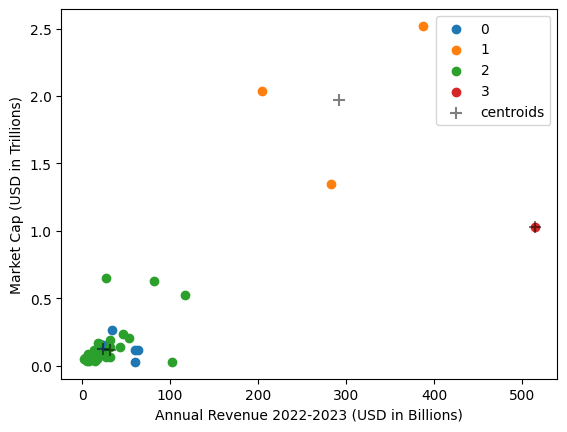

In [ ]:
plot_2d_kmeans(data_nums, kmeans_opt, "Annual Revenue 2022-2023 (USD in Billions)", "Market Cap (USD in Trillions)", scaler)

In [ ]:
plot_2d_kmeans_interactive(data_nums, kmeans_opt, "Annual Revenue 2022-2023 (USD in Billions)",
                           "Market Cap (USD in Trillions)", "Employee Size", "MY Interactive")

## Exercise 4

In [ ]:
# ISOLATION FOREST AND COMPARISON WITH THE RESULTS OF THE KMEANS!!
from sklearn.ensemble import IsolationForest
isolationforest = IsolationForest()
isolationforest.fit(data_nums) # you can use scaled or not scaled data (forest dont need the data to be scaled)
anomaly_scores = isolationforest.decision_function(data_nums)
# .predict() -> -1 for outliers and 1 for inliers

In [ ]:
anomaly_scores.argmin() # The index of the outlier

3

In [ ]:
pd.DataFrame(kmeans_opt.labels_).value_counts()

2    36
0    10
1     3
3     1
Name: count, dtype: int64

In [ ]:
kmeans_opt.labels_[anomaly_scores.argmin()]

3

# Session 14: Agglomerative Clustering

## Exercise 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

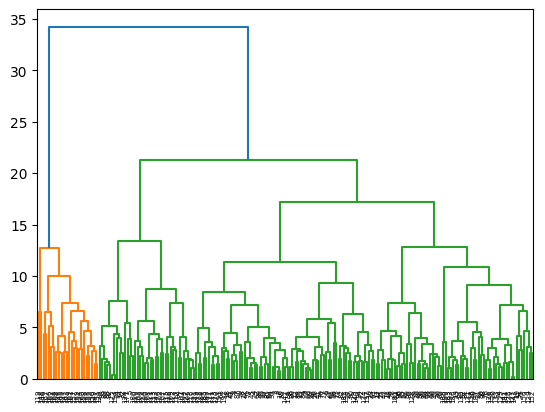

In [ ]:
# Step 1: Reading the data
df_spotify_base = pd.read_csv("spotify_songs.csv")
df_spotify = df_spotify_base.drop(columns=['type', 'uri', 'track_href', 'analysis_url', 'id', 'like'])

# Step 2: StandardScaler
scaler = StandardScaler()
np_spotify_scaled = scaler.fit_transform(df_spotify)

# Step 3: Determining the optimal number of clusters for Agglomerative Clustering using SciPy
import scipy.cluster.hierarchy as sch
z = sch.linkage(np_spotify_scaled, method='ward')
Dendrogram = sch.dendrogram(z)
# 2 clusters!

## Exercise 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage="ward") # linkage parameter needs to be same as the method in sch.linkage
agg.fit(np_spotify_scaled)
agg_clusters = agg.labels_

In [ ]:
pd.DataFrame(agg_clusters).value_counts()

0    133
2     38
1     24
Name: count, dtype: int64

In [ ]:
df_spotify_base['cluster'] = agg_clusters

pd.crosstab(df_spotify_base['cluster'] , df_spotify_base['like'] )

like,0,1
cluster,,
0,91,42
1,0,24
2,9,29


## Exercise 3

In [ ]:
!pip install import-ipynb
import import_ipynb
from google.colab import drive
drive.mount('/content/drive')

from drive.MyDrive.Colab_Notebooks.IntakeFebruary2024_ML_exercises.s00_useful_functions_unsupervised import *

In [ ]:
## SPYDER ##
import plotly.io as pio
pio.renderers.default = "browser"

In [ ]:
plot_2d_agglomerative_interactive(df_spotify_base, agg, "danceability", "energy", "instrumentalness", "MY SPOTIFY GRAPH")

## Exercise 4

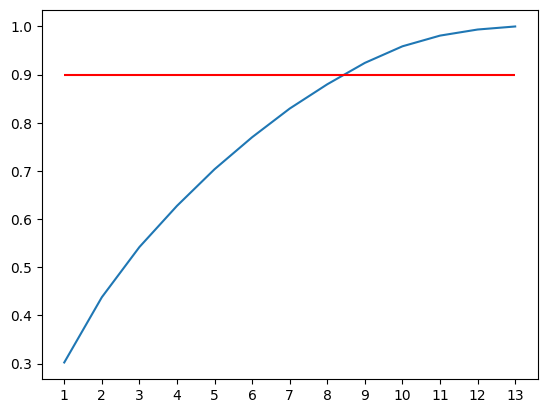

Shape before reduction: (195, 13)
Shape after reduction: (195, 9)


like,0,1
clusters,,
0,0,21
1,0,2
2,6,33
3,0,2
4,1,6
5,93,31


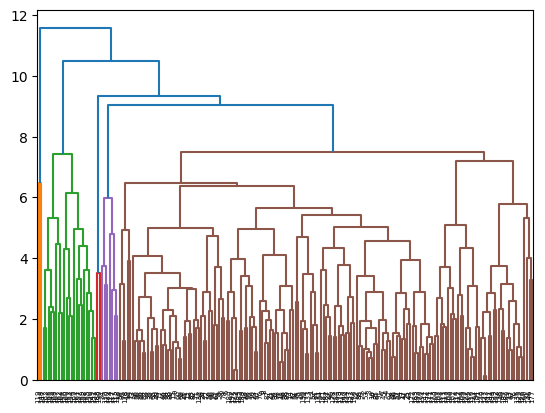

In [ ]:
# STEPS:
# 1. Scale the data --> np_spotify_scaled

# 2. PCA
pca_variance(np_spotify_scaled, np_spotify_scaled.shape[1], 0.9) # The optimal number of PC is 9

# Transforming the data with 9 PC
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
np_spotify_pca = pca.fit_transform(np_spotify_scaled)
print("Shape before reduction: " + str(np_spotify_scaled.shape))
print("Shape after reduction: " + str(np_spotify_pca.shape))

# 3. Agglomerative
import scipy.cluster.hierarchy as sch
z = sch.linkage(np_spotify_pca, method='complete') # 'single', 'ward', 'complete'
Dendrogram = sch.dendrogram(z)

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=6, linkage="complete") # linkage parameter needs to be same as the method in sch.linkage
agg.fit(np_spotify_pca)
agg_clusters = agg.labels_
df_spotify_base['clusters'] = agg.labels_
pd.crosstab(df_spotify_base['clusters'], df_spotify_base['like'])

In [ ]:
df_spotify['clusters'] = agg_clusters

In [ ]:
df_spotify.groupby('clusters').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
clusters,,,,,,,,,,,,,
0,0.307429,0.095045,4.857143,-24.793524,0.714286,0.044200,0.960619,0.813805,0.124443,0.125281,98.464286,253938.142857,3.761905
1,0.164500,0.524600,8.000000,-15.529500,1.000000,0.116400,0.480508,0.860500,0.215550,0.058600,113.528500,300973.000000,1.000000
2,0.519923,0.745205,5.512821,-7.579692,0.230769,0.092033,0.262132,0.338676,0.122685,0.372726,110.691436,240670.487179,3.871795
3,0.789000,0.648500,7.500000,-10.838500,0.500000,0.046900,0.045850,0.232500,0.051700,0.967000,127.281000,573573.000000,4.000000
4,0.304714,0.959000,4.428571,-6.491000,0.285714,0.111429,0.000223,0.586663,0.408286,0.288286,112.824143,203429.857143,3.571429
5,0.753024,0.680452,5.588710,-7.536073,0.612903,0.188892,0.248167,0.007378,0.146438,0.605015,128.675000,191312.830645,4.016129


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_spotify['clusters']
X = df_spotify.drop(columns=['clusters'])

# Train_test

# Scaling

# GridSearchCV
# .fit
# .predict
# accuracy metrics / f1score / ...